In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [34]:
import seaborn as sns
import time
%matplotlib inline

In [35]:
a = np.loadtxt('EDGES_data.txt', unpack=True)
frequency = a[0, :]
data = a[1, :]
nu_c=75.0

# 全景放射　+ flattened GSmodel

[ 8.32524552e+03 -4.47416097e+04  1.31054545e+05 -2.12238219e+05
  2.04856830e+05 -1.17914612e+05  3.74862262e+04 -5.07764495e+03
  5.62236366e-01  7.83181901e+01  1.92572685e+01  7.82044111e+00]
rms = 0.026303106252789768, AIC = 18.71718502325295, AIC2 = -433.14071924996307


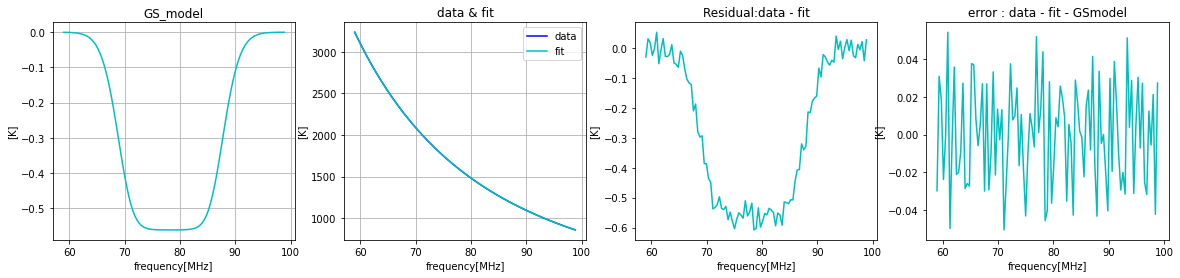

In [92]:
def AIC(r2 , k = 9):
    Se = np.sum( r2**2 )
    
    return 2 * np.log( Se ) + 2 * k

def AIC2(r2, k):
    n = 103
    Se = np.sum( r2**2 )
    return n * ( np.log( 2 * np.pi * Se / n ) + 1 ) + 2 * k

def f(x,d0, d1, d2 , d3, d4, d5, d6, d7):
    return d0 * np.power( ( x / nu_c ), 0 - 2.5) + d1 * np.power( ( x / nu_c ) , 1 - 2.5 ) \
    + d2 * np.power( ( x / nu_c ), 2 - 2.5)  + d3 * np.power( ( x / nu_c ), 3 - 2.5 ) \
    + d4 * np.power( ( x / nu_c ), 4 - 2.5 ) + d5 * np.power( ( x / nu_c ), 5 - 2.5 ) \
    + d6 * np.power( ( x / nu_c ), 6 - 2.5 ) + d7 * np.power( ( x / nu_c ), 7 - 2.5 )
  
def GSmodel(x, p0, p1, p2, p3):
    A_21 = p0
    nu_21 = p1
    w_21 = p2
    tau_21 = p3
    B_21 = 4 * np.power(x-nu_21,2) /w_21/w_21 \
        * np.log(-np.log((1+np.exp(-1*tau_21))*0.5)/tau_21)
    T_21 = -1*A_21 * (1-np.exp(-1*tau_21 * np.exp(B_21))) / (1-np.exp(-1*tau_21))
    return T_21
    
def fgs(x, d0, d1, d2, d3, d4, d5, d6, d7, p0, p1, p2, p3):
    return f(x, d0, d1, d2, d3, d4, d5, d6, d7) + GSmodel(x, p0, p1, p2, p3)

p_init = np.array([ 8.47070568e+03, -4.57422336e+04,  1.33989231e+05, -2.16995266e+05, 2.09459843e+05 , -1.20573494e+05, 3.83352296e+04, -5.19325543e+03
                    ,5.62352772e-01, 7.83155493e+01, 1.92593926e+01, 7.81595528e+00
                  ])
bounds=( [ -1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6,
          0 , 60 , 5 , 0 ],
        [ 1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,
          4 , 90 , 40 , 40 ]
          )

Fit_y, cov = curve_fit(fgs, frequency, data, p0=p_init, maxfev=1000000, bounds = bounds)
print(Fit_y)

fig = plt.figure(figsize=(20,4))

ax = fig.add_subplot(141)
ax.plot(frequency, GSmodel(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11]), c = 'c')
ax.set_title('GS_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")
plt.grid()


ax = fig.add_subplot(142)
ax.set_title('data & fit')
ax.plot(frequency, data , color="b", label="data" )
ax.plot(frequency, f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7]), label="fit" , color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.legend()
ax.set_ylabel("[K]")
plt.grid()

r1 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7])

ax = fig.add_subplot(143)
ax.set_title('Residual:data - fit')
ax.plot(frequency, r1, color="c" )
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r2 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7]) - GSmodel(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11])

print("rms = {}, AIC = {}, AIC2 = {}".format( ( np.mean(r2**2) )**0.5, AIC( r2,k =  12 ) , AIC2(r2,12)))

ax = fig.add_subplot(144)
ax.plot(frequency, r2, color="c")
ax.set_title('error : data - fit - GSmodel')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")


plt.show() 

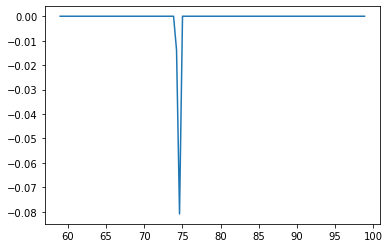

In [93]:
def GSmodel(x, p0, p1, p2, p3):
    A_21 = p0
    nu_21 = p1
    w_21 = p2
    tau_21 = p3
    B_21 = 4 * np.power(x-nu_21,2) /w_21/w_21 \
        * np.log(-np.log((1+np.exp(-1*tau_21))*0.5)/tau_21)
    T_21 = -1*A_21 * (1-np.exp(-1*tau_21 * np.exp(B_21))) / (1-np.exp(-1*tau_21))
    return T_21
plt.plot(frequency ,GSmodel(frequency, 2.37092392e-00,  7.44392933e+01,  2.53995894e-1,  1.16751049e+01,) )

# sin形　＋　全景放射　+ flattened GSmodel でfit する
# sin 形は機械の較正誤差を意味する
https://arxiv.org/pdf/1910.03165.pdf 

model number 128 flattened Gaussinan Log-polynomial order, T ̄Fg:7 Damped sinusoid,Tcal 19 , Noise model, N 22 \

Tcal = (ν/ν0) ** b * [a0 sin(2πν/P) + a1 cos(2πν/P)]  19\
T_FG = 10 ** ( d_i * log_10 ( nu / nu_c)*i )
-4 < b < 4  -10 < a0,a1 < 2 ,10 < P < 15 
0 < tau < 40, 0< A < 4 , 60 < nu_0 < 90 , 5 < w < 40 

[ 1.57540473e+03  1.02384824e+03 -1.44471054e+03  7.14909115e+01
  1.54578960e+03 -1.57966598e+03  6.63198642e+02 -1.04631632e+02
  5.19532024e-01  7.80807694e+01  1.99691706e+01  7.86914668e+00
 -1.05402996e+01 -3.91793675e-03 -8.32750000e-03  1.04123329e+01]
rms = 0.02593779405056193, AIC = 26.66124139979388, AIC2 = -428.021815858105


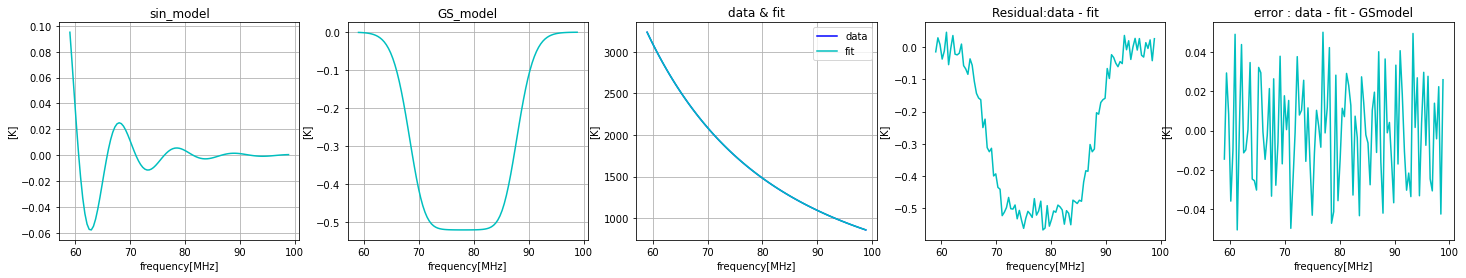

In [94]:
def AIC(r2 = r2, k = 9):
    Se = np.sum( r2**2 )
    
    return 2 * np.log( Se ) + 2 * k

def f(x,d0, d1, d2 , d3, d4, d5, d6, d7):
    return d0 * np.power( ( x / nu_c ), 0 - 2.5) + d1 * np.power( ( x / nu_c ) , 1 - 2.5 ) \
    + d2 * np.power( ( x / nu_c ), 2 - 2.5)  + d3 * np.power( ( x / nu_c ), 3 - 2.5 ) \
    + d4 * np.power( ( x / nu_c ), 4 - 2.5 ) + d5 * np.power( ( x / nu_c ), 5 - 2.5 ) \
    + d6 * np.power( ( x / nu_c ), 6 - 2.5 ) + d7 * np.power( ( x / nu_c ), 7 - 2.5 )
  
def GSmodel(x, p0, p1, p2, p3):
    A_21 = p0
    nu_21 = p1
    w_21 = p2
    tau_21 = p3
    B_21 = 4 * np.power(x-nu_21,2) /w_21/w_21 \
        * np.log(-np.log((1+np.exp(-1*tau_21))*0.5)/tau_21)
    T_21 = -1*A_21 * (1-np.exp(-1*tau_21 * np.exp(B_21))) / (1-np.exp(-1*tau_21))
    return T_21

def sin_model( x, b, a0, a1, P ):
    T_cal = ( x / nu_c ) ** b *  ( a0 * np.sin( 2 * np.pi * x / P) + a1 * np.cos( 2 * np.pi * x / P )) 
    return T_cal
    
    
def fgs(x, d0, d1, d2, d3, d4, d5, d6, d7, p0, p1, p2, p3,  b, a0, a1, P):
    return f(x, d0, d1, d2, d3, d4, d5, d6, d7) + GSmodel(x, p0, p1, p2, p3) + sin_model( x, b, a0, a1, P )

p_init = np.array([ 1.63838324e+03,  8.38880450e+02, -1.30258340e+03,  8.64810854e+01,
                      1.52952387e+03, -1.60990166e+03,  6.75177647e+02, -1.03544093e+02,
                      2.37092392e-00,  7.44392933e+01,  2.53995894e+01,  2.16751049e+01,
                      -3.27676385e-02, -2.09572524e-03, -5.97291890e-02,  1.21031651e+01
                  ])

bounds=( [ -1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6,
          0 , 70 , 5 , 0,
         -20 , -10, -10, 10
         ],
        [ 1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,
          4 , 85 , 30 , 30,
         4, 2, 2, 15
        ]
          )

Fit_y, cov = curve_fit(fgs, frequency, data, p0=p_init, maxfev=1000000, bounds = bounds)
print(Fit_y)

fig = plt.figure(figsize=(25,4))
ax = fig.add_subplot(151)
ax.plot(frequency, sin_model(frequency, Fit_y[12], Fit_y[13], Fit_y[14],Fit_y[15]), c = 'c')
ax.set_title('sin_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")
plt.grid()

ax = fig.add_subplot(152)
ax.plot(frequency, GSmodel(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11]), c = 'c')
ax.set_title('GS_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")
plt.grid()


ax = fig.add_subplot(153)
ax.set_title('data & fit')
ax.plot(frequency, data , color="b", label="data" )
ax.plot(frequency, f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7]), label="fit" , color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.legend()
ax.set_ylabel("[K]")
plt.grid()

r1 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7]) \
-sin_model(frequency, Fit_y[12], Fit_y[13], Fit_y[14],Fit_y[15])

ax = fig.add_subplot(154)
ax.set_title('Residual:data - fit')
ax.plot(frequency, r1, color="c" )
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r2 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7]) - GSmodel(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11])\
     -sin_model(frequency, Fit_y[12], Fit_y[13], Fit_y[14],Fit_y[15])

print("rms = {}, AIC = {}, AIC2 = {}".format( ( np.mean(r2**2) )**0.5, AIC( r2,k =  16 ) , AIC2(r2,16)))

ax = fig.add_subplot(155)
ax.plot(frequency, r2, color="c")
ax.set_title('error : data - fit - GSmodel')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

fig.savefig("FGS + sin+fitting2.png")

plt.show() 

# gaussian にする

[-4.08943088e+03  3.67536570e+04 -9.60978789e+04  1.36071549e+05
 -1.12236848e+05  5.33139783e+04 -1.32369446e+04  1.27223248e+03
  1.91699302e-01 -6.10356811e+00  7.83336946e+01 -1.53567665e+00
  1.01454335e-02 -1.09294699e-01  1.21068773e+01]
rms = 0.026260285466532706, AIC = 24.710667818890116, AIC2 = -427.476355274649


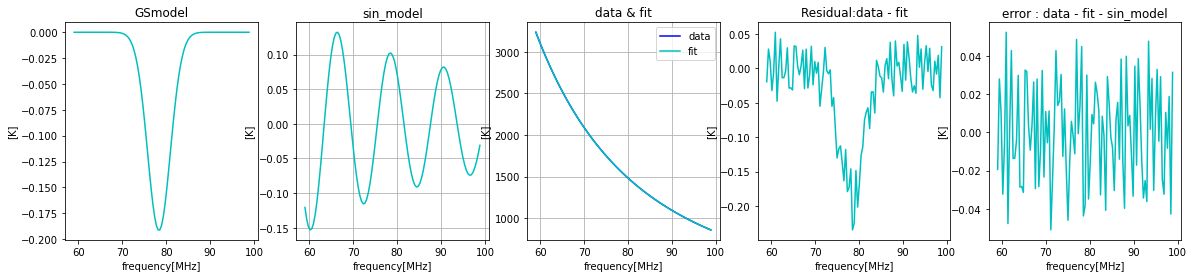

In [95]:
def f(x,d0, d1, d2 , d3, d4, d5, d6, d7):
    return d0 * np.power( ( x / nu_c ), 0 - 2.5) + d1 * np.power( ( x / nu_c ) , 1 - 2.5 ) \
    + d2 * np.power( ( x / nu_c ), 2 - 2.5)  + d3 * np.power( ( x / nu_c ), 3 - 2.5 ) \
    + d4 * np.power( ( x / nu_c ), 4 - 2.5 ) + d5 * np.power( ( x / nu_c ), 5 - 2.5 ) \
    + d6 * np.power( ( x / nu_c ), 6 - 2.5 ) + d7 * np.power( ( x / nu_c ), 7 - 2.5 )

def GSmodel(x, A, w, nu_0):
    T_21 = - A * np.e ** ( -4 * np.log(2) * ( x - nu_0 ) **2 / w **2 )
    return T_21
  
def sin_model( x, b, a0, a1, P ):
    T_cal = ( x / nu_c ) ** b *  ( a0 * np.sin( 2 * np.pi * x / P) + a1 * np.cos( 2 * np.pi * x / P )) 
    return T_cal
    
    
def fgs(x, d0, d1, d2, d3, d4, d5, d6, d7, A, w, nu_0 , b, a0, a1, P):
    return f(x, d0, d1, d2, d3, d4, d5, d6, d7) +  GSmodel(x, A, w, nu_0) + sin_model( x, b, a0, a1, P )

p_init = np.array([-5.88404512e+03, -3.73866143e+03, -1.16478763e+03, 7.93874947e+01, 7.55530591e+03, -1.20573494e+05, 3.83352296e+04, -5.19325543e+03
                   ,3.74339047e-01,  1.30909433e+01,  8.08410411e+01
                   ,-1.57307631e+00, 7.02648828e-0, -8.98361587e-0, 1.25632928e+01
                  ]
                 )
bounds=( [ -1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6,
          0 , 0 , 60 ,
         -4 , -10, -10, 10
         ],
        [ 1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,
          4 , 40 , 85 ,
         4, 2, 2, 15
        ]
          )
Fit_y, cov = curve_fit(fgs, frequency, data, p0=p_init, maxfev=1000000)
print(Fit_y)

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(151)
ax.plot(frequency, GSmodel( frequency, Fit_y[8], Fit_y[9], Fit_y[10] ), c = 'c')
ax.set_title('GSmodel')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

ax = fig.add_subplot(152)
ax.plot(frequency, sin_model(frequency, Fit_y[11], Fit_y[12], Fit_y[13],Fit_y[14]), c = 'c')
ax.set_title('sin_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")
plt.grid()

ax = fig.add_subplot(153)
ax.set_title('data & fit')
ax.plot(frequency, data , color="b", label="data" )
ax.plot(frequency, f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7]), label="fit" , color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.legend()
ax.set_ylabel("[K]")
plt.grid()

r1 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7])-sin_model(frequency, Fit_y[11], Fit_y[12], Fit_y[13],Fit_y[14])

ax = fig.add_subplot(154)
ax.set_title('Residual:data - fit')
ax.plot(frequency, r1, color="c" )
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r2 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7]) - GSmodel( frequency, Fit_y[8], Fit_y[9], Fit_y[10] ) - sin_model(frequency, Fit_y[11], Fit_y[12], Fit_y[13],Fit_y[14])

print("rms = {}, AIC = {}, AIC2 = {}".format( ( np.mean(r2**2) )**0.5, AIC( r2,k =  15 ) , AIC2(r2,15)))


ax = fig.add_subplot(155)
ax.plot(frequency, r2, color="c")
ax.set_title('error : data - fit - sin_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

fig.savefig("GS + sin+fitting2.png")
plt.show() 

# gaussian を抜く

[ 3.22739837e+03 -8.68845998e+03  2.23508129e+04 -3.12861599e+04
  2.54474684e+04 -1.20825831e+04  3.12619474e+03 -3.44473811e+02
 -9.53010251e-01  6.35697149e-02 -1.93706193e-02  1.24519576e+01]
rms = 0.027520925040546877, AIC = 18.898223364099486, AIC2 = -423.8172446963664


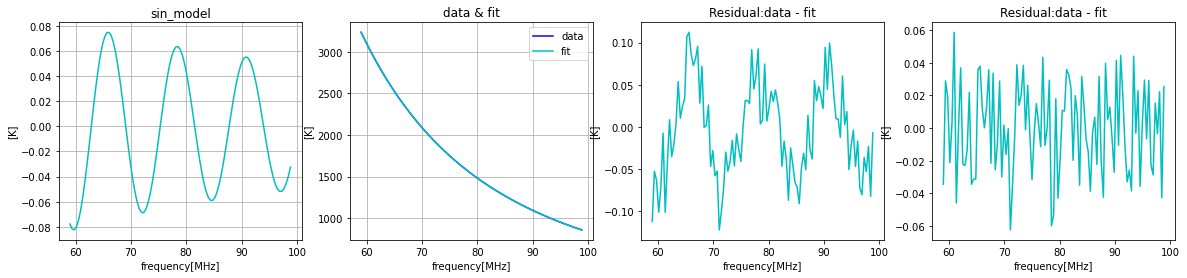

In [96]:
def f(x,d0, d1, d2 , d3, d4, d5, d6, d7):
    return d0 * np.power( ( x / nu_c ), 0 - 2.5) + d1 * np.power( ( x / nu_c ) , 1 - 2.5 ) \
    + d2 * np.power( ( x / nu_c ), 2 - 2.5)  + d3 * np.power( ( x / nu_c ), 3 - 2.5 ) \
    + d4 * np.power( ( x / nu_c ), 4 - 2.5 ) + d5 * np.power( ( x / nu_c ), 5 - 2.5 ) \
    + d6 * np.power( ( x / nu_c ), 6 - 2.5 ) + d7 * np.power( ( x / nu_c ), 7 - 2.5 )
  
def sin_model( x, b, a0, a1, P ):
    T_cal = ( x / nu_c ) ** b *  ( a0 * np.sin( 2 * np.pi * x / P) + a1 * np.cos( 2 * np.pi * x / P )) 
    return T_cal
    
    
def fgs(x, d0, d1, d2, d3, d4, d5, d6, d7 , b, a0, a1, P):
    return f(x, d0, d1, d2, d3, d4, d5, d6, d7) + sin_model( x, b, a0, a1, P )

p_init = np.array([-5.88404512e+03, -3.73866143e+03, -1.16478763e+03, 7.93874947e+01, 7.55530591e+03, -1.20573494e+05, 3.83352296e+04, -5.19325543e+03
                   ,-1.57307631e+00, 7.02648828e-02, -8.98361587e-05, 1.25632928e+01
                  ]
                 )
bounds=( [ -1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6,
         -4 , -10, -10, 10
         ],
        [ 1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,
         4, 2, 2, 15
        ]
          )

Fit_y, cov = curve_fit(fgs, frequency, data, p0=p_init, maxfev=1000000, bounds = bounds)
print(Fit_y)

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(141)
ax.plot(frequency, sin_model(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11]), c = 'c')
ax.set_title('sin_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")
plt.grid()

ax = fig.add_subplot(142)
ax.set_title('data & fit')
ax.plot(frequency, data , color="b", label="data" )
ax.plot(frequency, f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7]), label="fit" , color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.legend()
ax.set_ylabel("[K]")
plt.grid()

r1 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7]) 

ax = fig.add_subplot(143)
ax.set_title('Residual:data - fit')
ax.plot(frequency, r1, color="c" )
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r2 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[5],Fit_y[6],Fit_y[7]) - sin_model(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11])

ax = fig.add_subplot(144)
ax.set_title('Residual:data - fit')
ax.plot(frequency, r2, color="c" )
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

fig.savefig("sin.png + fitting1.png")

print("rms = {}, AIC = {}, AIC2 = {}".format( ( np.mean(r2**2) )**0.5, AIC( r2,k =  12 ) , AIC2(r2,12)))


plt.show() 

# 前景のmodel を戻す

[-6.86272106e+03 -4.19259651e+03 -1.31419586e+03  9.35938880e+01
  8.51977286e+03  4.37048682e-01  7.81189006e+01  1.92654159e+01
  9.23861869e+00 -4.39479474e+00  1.53735516e-02  1.57959897e-03
  1.28222109e+01]
rms = 0.026149384488084623, AIC = 20.693739470504184, AIC2 = -432.3481652165245


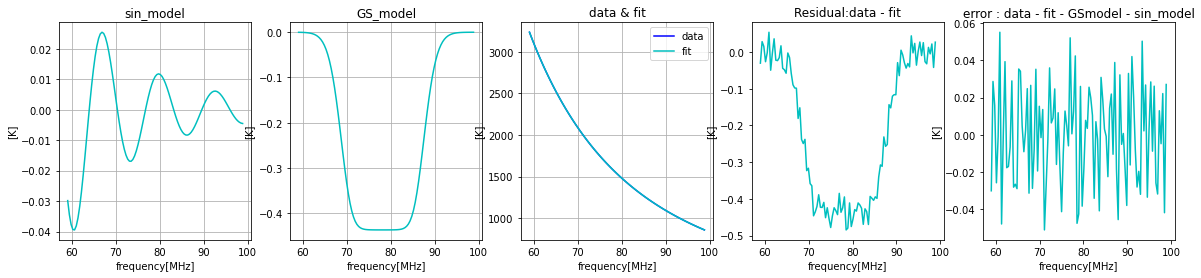

In [97]:
def f(x,a,b,c,d,e):
    return a * ( x / nu_c )**-2.5 + b * ( x / nu_c )**-2.5 * np.log( x / nu_c ) \
                        + c * ( x / nu_c )**-2.5 * (np.log(x / nu_c))**2 \
                        + d * ( x / nu_c )**-4.5 + e * ( x / nu_c )**-2
  
def sin_model( x, V, a0, a1, P ):
    T_cal = ( x / nu_c ) ** V *  ( a0 * np.sin( 2 * np.pi * x / P) + a1 * np.cos( 2 * np.pi * x / P )) 
    return T_cal
    
def GSmodel(x, p0, p1, p2, p3):
    A_21 = p0
    nu_21 = p1
    w_21 = p2
    tau_21 = p3
    B_21 = 4 * np.power(x-nu_21,2) /w_21/w_21 \
        * np.log(-np.log((1+np.exp(-1*tau_21))*0.5)/tau_21)
    T_21 = -1*A_21 * (1-np.exp(-1*tau_21 * np.exp(B_21))) / (1-np.exp(-1*tau_21))
    return T_21
    
def fgs(x, a, b, c, d, e, p0, p1, p2, p3, V, a0, a1, P):
    return f( x, a, b, c, d, e ) + GSmodel(x, p0, p1, p2, p3 ) + sin_model( x, V, a0, a1, P )

p_init = np.array([-5.88404512e+03, -3.73866143e+03, -1.16478763e+03, 7.93874947e+01, 7.55530591e+03
                   ,4.43169630e-01, 7.83884244e+01, 1.91511501e+01, 1.18670823e+01
                   ,-1.57307631e+00, 7.02648828e-02, -8.98361587e-05, 1.25632928e+01
                  ])

bounds=( [ -1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,
          0 , -40 , 60 ,
         -4 , -10, -10, 10
         ],
        [ 1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,
          4 , 40 , 85 ,
         4, 2, 2, 15
        ]
          )

Fit_y, cov = curve_fit(fgs, frequency, data, p0=p_init, maxfev=1000000)
print(Fit_y)

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(151)
ax.plot(frequency, sin_model(frequency, Fit_y[9], Fit_y[10], Fit_y[11],Fit_y[12]), c = 'c')
ax.set_title('sin_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")
plt.grid()

ax = fig.add_subplot(152)
ax.plot(frequency, GSmodel(frequency, Fit_y[5], Fit_y[6], Fit_y[7],Fit_y[8]), c = 'c')
ax.set_title('GS_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")
plt.grid()


ax = fig.add_subplot(153)
ax.set_title('data & fit')
ax.plot(frequency, data , color="b", label="data" )
ax.plot(frequency, f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]), label="fit" , color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.legend()
ax.set_ylabel("[K]")
plt.grid()

r1 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4])-sin_model(frequency, Fit_y[9], Fit_y[10], Fit_y[11],Fit_y[12])

ax = fig.add_subplot(154)
ax.set_title('Residual:data - fit')
ax.plot(frequency, r1, color="c" )
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r2 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]) - GSmodel(frequency, Fit_y[5], Fit_y[6], Fit_y[7],Fit_y[8]) \
- sin_model(frequency, Fit_y[9], Fit_y[10], Fit_y[11], Fit_y[12])

print("rms = {}, AIC = {}, AIC2 = {}".format( ( np.mean(r2**2) )**0.5, AIC( r2,k =  13 ) , AIC2(r2,13)))

ax = fig.add_subplot(155)
ax.plot(frequency, r2, color="c" )
ax.set_title('error : data - fit - GSmodel - sin_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

fig.savefig("FGS + sin.png + fitting3.png")
plt.show()

# sin + Gaussian_model + foregrand でやる 0 < tau < 40, 0< A < 4 , 60 < nu_0 < 90 , 5 < w < 40 

[-2.80344280e+03 -2.38196277e+03 -6.41148247e+02  7.18639515e+00
  4.54867367e+03  4.00000000e+00  4.00000000e+01  7.59524850e+01
  2.04803664e+00  4.68391703e-02 -3.66058979e-02  1.23848447e+01]
rms = 1.4629402180063682, AIC = 18.757736762222535


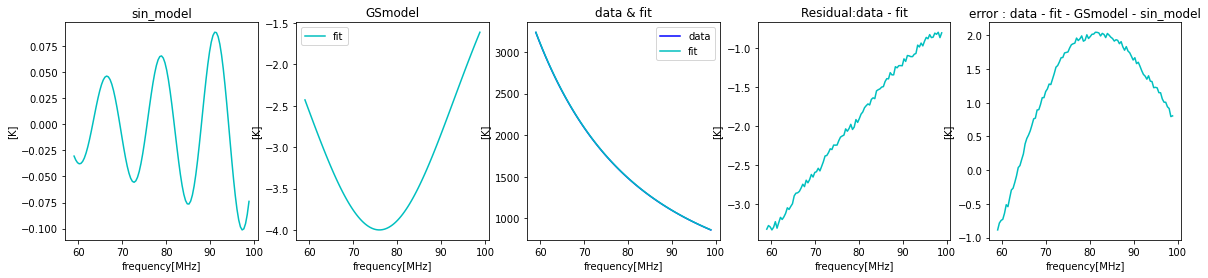

In [83]:
def f(x,a,b,c,d,e):
    return a * ( x / nu_c )**-2.5 + b * ( x / nu_c )**-2.5 * np.log( x / nu_c ) \
                        + c * ( x / nu_c )**-2.5 * (np.log(x / nu_c))**2 \
                        + d * ( x / nu_c )**-4.5 + e * ( x / nu_c )**-2
  
def sin_model( x, V, a0, a1, P ):
    T_cal = ( x / nu_c ) ** V *  ( a0 * np.sin( 2 * np.pi * x / P) + a1 * np.cos( 2 * np.pi * x / P )) 
    return T_cal

def GSmodel(x, A, w, nu_0):
    T_21 = -A * np.e ** ( -4 * np.log(2) * ( x - nu_0 ) **2 / w **2 )
    return T_21
    
    
def fgs(x, a, b, c, d, e, A, nu_0, w, V, a0, a1, P):
    return f( x, a, b, c, d, e ) + GSmodel(x, A, w, nu_0) + sin_model( x, V, a0, a1, P )

p_init = np.array(
    [-1.63983624e+04, -8.58318213e+03, -2.80775678e+03,  2.44384021e+02, 1.79056757e+04
     ,1.91699302e-01, 16.10356811e+00,  7.83336946e+01
     ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)
bounds=( [ -1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,
          0 , 5 , 60 ,
         -4 , -10, -10, 10
         ],
        [ 1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,
          4 , 40 , 85 ,
         4, 2, 2, 15
        ]
          )

Fit_y, cov = curve_fit(fgs, frequency, data, p0=p_init, maxfev=1000000, bounds= bounds)
print(Fit_y)

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(151)
ax.plot(frequency, sin_model(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11]), c = 'c')
ax.set_title('sin_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

ax = fig.add_subplot(152)
ax.set_title('GSmodel')
ax.plot(frequency, GSmodel(frequency, Fit_y[5], Fit_y[6], Fit_y[7]), label="fit" , color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.legend()
ax.set_ylabel("[K]")

ax = fig.add_subplot(153)
ax.set_title('data & fit')
ax.plot(frequency, data , color="b", label="data" )
ax.plot(frequency, f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]), label="fit" , color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.legend()
ax.set_ylabel("[K]")

r1 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]) - sin_model(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11])

ax = fig.add_subplot(154)
ax.set_title('Residual:data - fit')
ax.plot(frequency, r1, color="c" )
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r2 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]) - GSmodel(frequency, Fit_y[5], Fit_y[6] , Fit_y[7] ) - sin_model(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11])

print("rms = {}, AIC = {}".format( ( np.mean( r2**2 ) )**0.5, AIC(k = 12) ))

ax = fig.add_subplot(155)
ax.plot(frequency, r2, color="c")
ax.set_title('error : data - fit - GSmodel - sin_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

fig.savefig("GS + sin.png + fitting3.png")

plt.show()

# AIC は小さくなった
# GSmodel を抜く

[-1.93288182e+03 -1.98802381e+03 -4.91388179e+02 -9.82391598e+00
  3.69290326e+03  2.16794857e+00  4.63249901e-02 -3.64887760e-02
  1.23846901e+01]
rms = 0.03670596928407173, AIC = 12.757736762222537


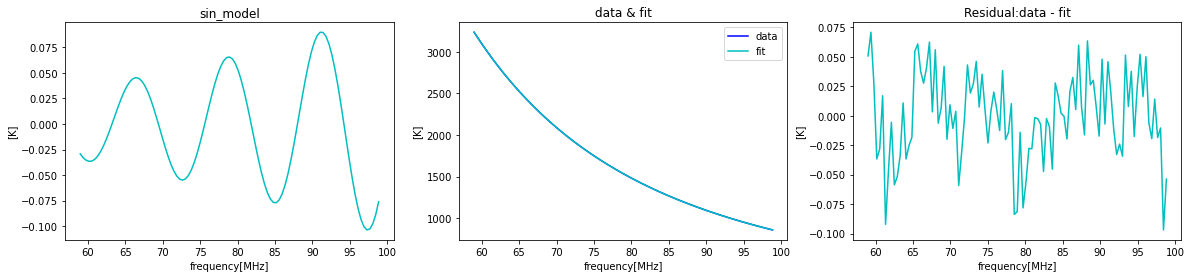

In [88]:
def f(x,a,b,c,d,e):
    return a * ( x / nu_c )**-2.5 + b * ( x / nu_c )**-2.5 * np.log( x / nu_c ) \
                        + c * ( x / nu_c )**-2.5 * (np.log(x / nu_c))**2 \
                        + d * ( x / nu_c )**-4.5 + e * ( x / nu_c )**-2
  
def sin_model( x, V, a0, a1, P ):
    T_cal = ( x / nu_c ) ** V *  ( a0 * np.sin( 2 * np.pi * x / P) + a1 * np.cos( 2 * np.pi * x / P )) 
    return T_cal
    
def fgs(x, a, b, c, d, e, V, a0, a1, P):
    return f( x, a, b, c, d, e ) + sin_model( x, V, a0, a1, P )

p_init = np.array(
    [-1.63983624e+04, -8.58318213e+03, -2.80775678e+03,  2.44384021e+02, 1.79056757e+04,
     -2.78818784e+00,  6.21841458e-02, -3.55374914e-02,  1.24606360e+01,
    ]
)
bounds=( [ -1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,
         -4 , -10, -10, 10
         ],
        [ 1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,
         4, 2, 2, 15
        ]
          )

Fit_y, cov = curve_fit(fgs, frequency, data, p0=p_init, maxfev=1000000, bounds=bounds)
print(Fit_y)

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(131)
ax.plot(frequency, sin_model(frequency, Fit_y[5], Fit_y[6], Fit_y[7],Fit_y[8]), c = 'c')
ax.set_title('sin_model')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

ax = fig.add_subplot(132)
ax.set_title('data & fit')
ax.plot(frequency, data , color="b", label="data" )
ax.plot(frequency, f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]), label="fit" , color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.legend()
ax.set_ylabel("[K]")

r1 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]) - sin_model(frequency, Fit_y[5], Fit_y[6], Fit_y[7],Fit_y[8])

ax = fig.add_subplot(133)
ax.set_title('Residual:data - fit')
ax.plot(frequency, r1, color="c" )
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

fig.savefig("sin.png + fitting3.png")
print("rms = {}, AIC = {}".format( ( np.mean( r1**2 ) )**0.5, AIC(k = 9) ))

plt.show()